对于你的线性回归模型，你将使用 scikit-learn 的 LinearRegression 类。此类会提供函数 fit() 来将模型与数据进行拟合。

In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_values, y_values)

NameError: name 'x_values' is not defined

在上述示例中，model 变量是拟合到数据 x_values 和 y_values 的线性回归模型。拟合模型意味着寻找拟合训练数据的最佳线条。我们使用模型的 predict() 函数做出两个预测。

In [ ]:
print(model.predict([ [127], [248] ]))

该模型返回了一个预测数组，每个输入数组一个预测结果。第一个输入 [127] 的预测结果是 438.94308857。第二个输入 [248] 的预测结果是 127.14839521。用 [127] 这样的数组（而不只是 127）进行预测的原因是模型可以使用多个特征进行预测。我们将在这节课的稍后部分讲解如何在线性回归中使用多个变量。暂时先继续使用一个值。

## Pandas 索引

1. 用中括号的索引
在用中括号索引时最容易犯错的是混淆了行索引和列索引。基本原则如下：

（1）单值索引只能索引列
df['A']是正确的写法，等同于df.A。如果想索引某一行，不能写成df['a']或df['a',:]，否则会报错。但可以改用df[df.index=='a']或者df.loc['a']的形式。

（2）列表索引也只能索引列

如果想同时索引多列，可以写成df[['A','B']]，记住有两层中括号，不能少一层中括号。如果写成df['A','B']表示A行B列，逗号成了分隔维度之间的分隔符。列表索引可以改变索引列的顺序，例如写成df[['C','B','A']]将按C、B、A的顺序显示，这叫花式索引。花式索引也可以写成对象属性的形式，[[df.C, df.B, df.A]]也是正确的。

（3）切片只能索引多行
切片索引写成df['a':'c']或df[:2]表示索引a到c三行，但不能写成df['A':'C']或df[:,'A':'C']来索引三列。要想切片多列可以写成df.loc[:,'A':'C']，但这里不能少了loc和:,，否则也报错。另外，切片只能用中括号或loc索引，而不能写成对象属性的形式，df.loc[:, df.A:df.C]也会报错。
 

2. 用loc/iloc[]的索引

上面说了中括号不能对单个行进行索引，而用loc/iloc就解决了这个问题，例如df.loc['B']或df.iloc[2]，所以要想所以某一行只能用loc/iloc的形式。由于loc和iloc可以索引单个行，为了不引起混淆，索引单个列时必须在前面加上符号“:,”，例如df.loc[:,'A']表示索引A列，如果写成df.loc['A']就会报错，因为Notebook会解读为df的A行而df并没有A行。

 

3. 关于布尔索引

（1）布尔条件索引既可以索引行又可以索引列，既可以用于中括号索引又可以用于loc/iloc索引。但我建议尽量用loc索引，尤其是对列索引操作时不容易出错，用iloc或直接用方括号索引有时会出现未知错误。如果逻辑表达式是关于变量（列）取值的，布尔索引返回的是行数据，例如写成df.loc[关于列的条件]返回的是行数据。如果逻辑表达式是关于行索引取值的，例如写成df.loc[关于行的条件]，则返回的是列数据，例如df.loc[:, df.loc['c']>0.1]。另外还需注意df.loc[df['A']>0.1]中内层的df不能漏了，如写成df[['A']>0.1]或df['A'>0.1]系统只会把'A'当成是一个字符而报错，系统不知道A是指df的一列。如果只需要显示A列数据，不能写成df.A[df>0.1]，而应该写成df.A[df.A>0.1]。

（2）当逻辑表达式是关于列名的，布尔索引可以用于对列索引，例如df.iloc[:, df.columns!='B']或df.loc[:, df.columns!='B']都能执行，但此处不能少了loc和iloc，否则也报错。总之凡是把行索引写成“:,”再写列的选取条件的形式只能用在loc/iloc格式。

（3）如果要用布尔关系将多个条件组合起来，要给每个条件加小括号，例如df.loc[(df['A']>0.7) & (df['B']<0.5) & (df['C']>0.6)]，漏写小括号也会出错。注意这里的运算符是位运算符&，而不是布尔运算符and，后者也会出错。如果需要返回整个矩阵，只能用中括号索引，而不能用loc/iloc[]。例如返回df中大于0.1的值应当写成df[df>0.1]，而不能写成df.loc[df>0.1]
 

## 线性回归模型
机器学习是根据训练数据对变量之间的关系进行建模。当输出变量（相应变量）$y\in \mathbb{R}$是连续值时，我们称之为**回归分析**。回归分析的意思就是用函数描述一个或多个预测变量与相应变量y之间的关系，并根据该模型预测新观测值对应的相应。

* 给定训练数据$D = \{x_i|y_i\}^N_{i=1}$,其中$y\in \mathbb{R}$ 时连续值，一共有N个样本，回归分析的目标时学习一个从输如X到输出Y的映射
* 对新的测试数据x，用学习到的映射f对其进行预测:$\hat{y} = f(x)$
*若假设映射f是一个线性函数，即
    \begin{equation}
    	y = f(x|w) = \mathbf{w}^Tx
    \end{equation}
*我们称之为先行回归模型，其中$\mathbf{w}$表示线性回归系数。


有了模型和训练数据，我们需要根据训练数据学习一个最佳的模型。用数学语言描述，可通过最小化一个目标函数实现。

例:Boston房价预测
波士士顿房价数据集为大大波士士顿地区房价数据,是UCI ML(欧文文加利利福尼亚大大学机器器学习库)房价数据集的副本。

波士士顿房价数据已被用于许多涉及回归问题的机器学习论文中。该数据集有506个样本,每个样本包含波士士顿某地区的房屋的13个属性和该地区的房价中位数。回归分析的任务是根据某地区房屋的13个属性预测该地区的房价中位数y。

若采用线性回归模型来做房价预测,我们假设房屋的13个属性与该地区的房价中位数之间的关系为:

\begin{equation}
            y = \mathbf{w}^Tx = \sum^{13}_{j=1}w_j x_j + w_0
\end{equation}

其中$w_0$为截距项,$w_1,...,w_{13}$分别为13维特征对应的权重,向量$\mathbf{x}=(1,x_1,...,x_{13})$,即13个房屋属性加上常数组成的向量(增加元素1是为了了将截距项与属性统一一处理理,下面面如无无特别说明,通常假
设向量包含常量1)。



In [ ]:
import pandas as pd # 数据处理理
data = pd.read_csv("boston_housing.csv")
#通过观察前5行行行,了了解数据每列列(特征)的概况
data.head()

## 回归模型的目标函数

### 均方误差与总平方误差
总平方误差是指每个点的误差之和，方程式为：
\begin{equation}
	M = \sum\limits_{i=1}^m \frac{1}{2}(y-\hat{y})^2
\end{equation}
均方误差是指这些误差的平均值，方程式为：
\begin{equation}
	T = \sum\limits_{i=1}^m \frac{1}{2m}(y-\hat{y})^2
\end{equation}
好消息是，选择哪个并不重要。可以看出，总平方误差是多个均方误差相加的结果，因为M=mT
因此，既然导数是线性方程，T的梯度也是m乘以M的梯度。

但是，梯度下降步骤包括减去误差的梯度乘以学习速率 $\alpha$。因此，选择均方误差还是总平方误差只是选择不同的学习速率。

在现实中，我们可以借助算法判断什么样的学习速率比较合适。因此，如果我们使用均方误差或总平方误差，算法将只是选择不同的学习速率。

有了模型和训练数据,我们需要根据训练数据学习一个最佳的模型(参数)。用数学语言描述,可通过最小化一个目标函数实现。

---
机器学习模型的目标函数通常包含两项：损失函数L和正则项R，分别度量模型与训练数据的匹配程度（损失函数越小越匹配）和对模型复杂度的“惩罚”（避免过拟合）。
\begin{equation}
	J(\theta) = \sum\limits_{i=1}^N \mathcal{L}(f(x_i;\theta),y_i) + R(\theta)
\end{equation}
其中$\theta$表示模型的参数（线性回归中为w)
NB:目标函数最小既要求模型和训练数据拟合得好，又要求模型尽可能简单。这也体现了机器学习的基本准则：奥卡姆剃刀原理（Occam‘s razor）。

NB：正则项就是把之前所有的weight 加在一起放在loss中，惩罚loss函数。

<table>
   <tr>
      <td>L1</td>
      <td>Computationally Inefficient(unless data is sparse)</td>
      <td>Sparse outputs</td>
      <td>Feature Selection</td>
   </tr>
   <tr>
      <td>L2</td>
      <td>Computationally Efficient</td>
      <td>non-sparse outputs</td>
      <td>No Feature Selection</td>
   </tr>
</table>

#### 批量梯度下降法与随机梯度下降法
到目前为止，我们已经见过两种线性回归方法。

>逐个地在每个数据点应用平方（或绝对）误差，并重复这一流程很多次。

>_同时_在每个数据点应用平方（或绝对）误差，并重复这一流程很多次。

具体而言，向数据点应用平方（或绝对）误差时，就会获得可以与模型权重相加的值。我们可以加上这些值，更新权重，然后在下个数据点应用平方（或绝对）误差。或者同时对所有点计算这些值，加上它们，然后使用这些值的和更新权重。

后者第二种方法叫做批量梯度下降法。前者第一种方法叫做随机梯度下降法
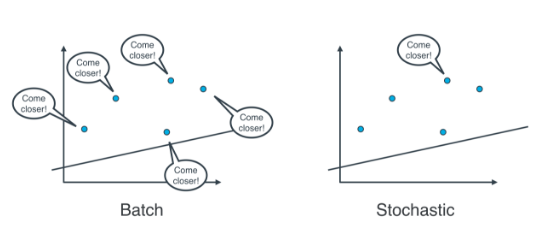

问题是，实际操作中使用哪种方法？

实际上，在大部分情况下，两种都不用。思考以下情形：如果你的数据十分庞大，两种方法的计算速度都将会很缓慢。线性回归的最佳方式是将数据拆分成很多小批次。每个批次都大概具有相同数量的数据点。然后使用每个批次更新权重。这种方法叫做小批次梯度下降法。

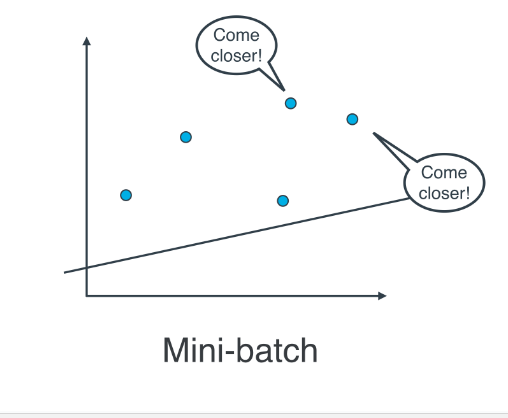

## 回归任务的损失函数
### L2
令残差r = y-f(x)表示模型预测值f(x)和真值y之间的差异，回归任务常用的损失函数是L2损失（least square）
\begin{equation}
	\mathcal{L}(f(x;\theta),y) = \frac{1}{2}(y-f(x_i;\theta))^2 = \frac{1}{2}r^2_i
\end{equation}
即残差的平方。所有样本的损失函数值被称为经验风险，表示模型与训练数据的拟合程度。当损失函数取L2损失时，所有样本的损失函数值之和称为残差平方和（residual sum of squares, RSS）:
\begin{equation}
	RSS(\theta)=\sum\limits_{i=}^N \mathcal{L}(f(x_i;\theta),y_i)=\frac{1}{2}\sum\limits_{i=1}^N(y_i-f(x_i;\theta))^2 = \frac{1}{2}\sum\limits_{i=1}^Nr_i^2
\end{equation}
从概率角度，最小L2损失等价于高斯白噪声下假设下的极大然似估计。令 $y = f(x) + \epsilon$,其中噪音$\epsilon \sim N(0,\sigma^2)$为高斯白噪声，则$p(y|\mathbf{x}) \sim N(f(x),\sigma^2)$， $\epsilon$（不理解）。

>正态分布$x \sim N(\mu,\sigma^2)$的概率密度函数为：$p(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$

>极大然似估计

>假设数据由某个位置模型产生的，模型的参数用$\theta$表示，则定义在该模型数据的似然估计（likelihood)为数据D出现的概率：
\begin{equation}
	L(\theta) = p(\mathcal{D}|\theta)=\prod_{i=1}^{N}p(y_i|x_i,\theta)
\end{equation}
为了计算方便，更多的时候我们对似然函数取log，这样连乘就成了求和（减小计算难度）
\begin{equation}
	l(\theta) = logL(\theta)=logp(\mathcal{D}|\theta)=\sum\limits_{i=1}logp(y_i|x_i,\theta)
\end{equation}
极大然似估计（Maximize Likelihood Estimator,MLE),为使得似然值最大的模型（或模型参数$\theta$),可以理解为线上每一点都是高斯分布。
\begin{equation}
	\hat{\theta}=arg\max\limits_{\theta}l(\theta)
\end{equation}

极大似然可等价地写成极小负log似然损失（negative log likelihood,NLL)(在sklearn中称为logloss)
\begin{equation}
\begin{split}
	NLL(\theta) &= -\sum\limits_{i=1}^Nlogp(y_i|x_i,\theta)
	          \\&= -\sum\limits_{i=1}^Nlog[(\frac{1}{2\pi\sigma^2})^{-\frac{1}{2}}exp(-\frac{1}{2\sigma^2}(y_i-f(x_i))^2)]
	          \\&=\frac{N}{2}log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum\limits_{i=1}^N(y_i-f(x_i))^2
\end{split}
\end{equation}
上式中第一项与模型f(x)无关，之和噪声$\epsilon$水平有关；第二项等于$\frac{1}{\sigma^2}RSS(\theta)$
\begin{equation}
	\frac{RSS(\theta)}{\sigma^2}=\frac{1}{2\sigma^2}\sum\limits_{i=1}^N(y_i-f(x_i;\theta))^2 
\end{equation}
因此最小L2损失（最小RSS（$\theta$))等价于最小负log似然损失（NLL($\theta$),等价于极大似然估计MLE（log)(相差常数倍不影响目标函数取值位置)

#### L2 相当于平方技巧


### L1损失

L2损失在回归分析中很常用。但是L2损失对于离群点（outliers）敏感。离群点通常远离大部分数据，如果根据大部分数据（去除离群点）得到理想模型，则残差r = y-f(x)（预测值f(x)和真值y)的绝对值比较大（训练数据中有离群点）。也就是说，算法会根据大部分数据得到一个理想模型，但是用损失函数调优时会把模型调大。因为残差变大。因此，采用L2损失而得到的理想模型对于离群点敏感。

当数据中存在离群点的时候，可采用L1损失，即残差r=y-f(x)的绝对值；
\begin{equation}
	\mathcal{L}(f(x;\theta),y)=|y-f(x;\theta)|=|r|
\end{equation}
由于L1损失虽然对离群点不敏感，但绝对值函数在原点不连续，优化相对麻烦。
从概率角度，L1损失可以解释为噪声为拉普拉斯分布假设下的极大然似估计。$y = f(x)+\epsilon$,噪声$\epsilon \sim, Laplace(\mu,b)$为拉普拉斯噪声，即$p(y|x) \sim Laplace(f(x),b)$也就是说在线性层面上，线上面的点都符合拉普拉斯分布。

>拉普拉斯分布$x\sim Laplace(\mu,b)$的概率密度函数为：$p(x)=\frac{1}{2b}e^{-\frac{1}{b}|x-\mu|}$

拉普拉斯噪声分布假设下，log似然函数为
\begin{equation}
	l(\theta)=logp(D,\theta)=\sum\limits_{i=1}^Nlogp(y_i|x_i,\theta)
\end{equation}
极大似然可等价地写成极小负log似然损失（negtive log likelihood, NLL)
\begin{equation}
\begin{split}
NLL(\theta) &=-\sum\limits_{i=1}^Nlogp(y_i|x_i,\theta)
          \\&=-\sum\limits_{i=1}^Nlog(\frac{1}{2b}exp(-\frac{1}{b}|x-\mu|)
          \\&=Nlog(2b)+\frac{1}{b}\sum\limits_{i=1}^N|y_i-f(x_i)|
\end{split}
\end{equation}
上市中第一项与f(x)无关，第二项等于经验风险（$\sum\limits_{i=1}^N|y-f(x)|$）的1/b倍。因此最小L1损失等价于最小负log似然损失，等价于噪声为拉普拉斯分布假设下的极大似然估计（相差数倍不影响目标函数取极值的位置，因为我们只关心参数，不关心输出）
NB：极小负log似然损失等价于极大似然估计。

### Huber损失

huber综合了L2损失和L1损失的优点，Huber损失在回归分析中也很常用。Huber损失定义为：
\begin{equation}
\begin{split}
\mathcal{L}_\delta(f(x;\theta),y) &= \frac{1}{2}(y-f(x;\theta))^2 \ if |y-f(x;\theta)|\le \delta
                                \\&= \delta|y-f(x;\theta)|-\frac{1}{2}\delta^2 \ otherwise
\end{split}
\end{equation}
即当残差很小的时候，损失函数为L2范数（0处连续）；当残差大的时候，为L1损失（对离群点不敏感）。这样Huber损失即处处连续，又对离群点不敏感。



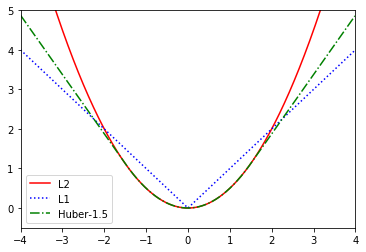

In [5]:
# Plots L2, L1 and Huber losses.
import matplotlib.pyplot as pl
import numpy as np

delta = 1.5
huber = lambda x: (x**2/2) * (abs(x) <= delta) + (delta * abs(x) -
delta**2/2) * (abs(x) > delta)
l2 = lambda x: (abs(x)**2)/2
l1 = abs

funs = [l2, l1, huber]
styles = ['r-', 'b:', 'g-.']
labels = ['L2', 'L1', 'Huber-'+str(delta)]
x = np.arange(-4, 4, .01)
for i, fun in enumerate(funs):
    pl.plot(x, fun(x), styles[i], label=labels[i])

pl.axis([-4, 4, -0.5, 5])
pl.legend()
pl.savefig('huberLossDemo.png')
pl.show()

#### 无正则：最小二乘线性回归（Ordinary Least Square, OLS)

由于线性模型比较简单，实际应用中有时正则项为空，得到最小二乘线性回归（Ordinary Least Square， OLS）（此时目标函数中只有残差平方和，“平方在古时候称为“二乘”），即

\begin{equation}
	J(w)=\sum\limits_{i=1}^N(y_i-W^Tx_i)^2=RSS(w)
\end{equation}

由于最小二乘回归模型的目标函数中只有残差平方和,因此从概率角度,最小二乘回归等价于高斯白噪声假设下的极大似然估计。


#### L2正则：岭回归(Ridge Regression)

一个常用的正则时L2正则项。带L2正则的线性回归模型被称之为岭回归（Ridge Rergession)模型，模型的目标函数：
\begin{equation}
\begin{split}
J(w)&=\sum\limits_{i=1}^N(y_i-w^Tx_i)^2+\lambda||w||^2_2
  \\&=\sum\limits_{i=1}^N(y_i-w^Tx_i)^2+\lambda\sum\limits_{j=1}^Dw^2_j
\end{split}	
\end{equation}
其中D表示特征的维数，$\lambda$为正则参数，控制正则惩罚的强度。
\\
从概率角度，岭回归等价与参数先验分布为正态分布的贝叶斯估计
\\
贝叶斯估计
\\
假定在给定模型（模型参数为$\theta$）下数据产生过程为$p(y|x_i,\theta)$,则在该模型下数据$\mathcal{D}=\{x_i|y_i\}^N_{i=1}$产生的似然（同极大似然估计）：
\begin{equation}
	L(\theta)=p(\mathcal{D|\theta})=\prod_{i=1}^{N}p(y_i|x_i,\theta)
\end{equation}
假设模型参数$\theta$的先验分布为$p(\theta)$,则根据贝叶斯公式，模型参数的后验估计为,p(D)可以被舍弃，因为都是一样的：
\begin{equation}
\begin{split}
 p(\theta|\mathcal{D})&=\frac{p(\theta,\mathcal{D})}{p(\mathcal{D})}
                     \\& \propto p(\theta,\mathcal{D})
                     \\&=p(\mathcal{D}|\theta)p(\theta)
\end{split}
\end{equation}
上式表示为，看到数据后模型的分布。通常取概率最大的模型，得到最大后验估计（Maximum a posteriori estimation, MAP)为
\begin{equation}
	\theta = arg\max\limits_{\theta}p(\theta|\mathcal{D})
\end{equation}
同极大似然估计一样，为了计算方便，更多的时候我们对公式两边取log运算得到
\begin{equation}
	\theta = arg\max\limits_{\theta}log(p(\theta|\mathcal(D)))=arg\max(logp(\mathcal{D}|\theta)+log(p(\theta))
\end{equation}
在回归任务中，假设残差的分布为$\epsilon \sim N(0,\sigma^2)$,$p(y|x)\sim N(f(x),\sigma^2)$。则线性回归的似然函数可写成：
\begin{equation}
	L(\theta)=p(\mathcal{D}|\theta)=\prod_{i=1}^{N}p(y_i|x_i,\theta)=\prod_{i=1}^{N}N(y_i|\mathbf{w}^T\textbf{x}_i,\sigma^2)\propto exp(-\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\textbf{x}_i))
\end{equation}
若假设参数$\mathbf{w}$中每个维之间相互独立（$\mathbf{w}$的联合分布等于个维特征边缘分布的乘积），且每一维的先验分布为$w_i \sim N(0,\tau^2)$,即
\begin{equation}
	p(\mathbf{w})=\prod_{j=1}^{D}N(w_j|0,\tau^2)\propto exp(-\frac{1}{2\tau^2}\sum_{j=1}^{D}w_j^2)=exp(-\frac{1}{2\tau^2}\mathbf{w}^T\mathbf{w})
\end{equation}
$w_j$分布为均值为0的正态分布，表示我们偏向于较小的系数值，从而得到的模型比较简单，其中$\frac{1}{\tau^2}$控制先验的强度（$\frac{1}{\tau^2}$越大，先验分布的方差越小，表示每个$w_j$在0（中值）附近的概率更大，要求$w_j$在0附近的意愿越强烈）
\\
根据贝叶斯公式，参数的最大后验估计（MAP)为
\begin{equation}
\begin{split}
\mathbf{w} &= arg\max\limits_{\mathbf{w}}log(p(\mathbf{w}|\mathcal{D}))
         \\&= arg\max\limits_{\mathbf{w}}(logp(\mathcal{D}|\mathbf{w})+log(p(\mathbf{w}))
         \\&= arg\max\limits_{\mathbf{w}}(\sum_{i=1}^{N}logN(y_i|\mathbf{w}^T\mathbf{\textbf{x}}_i, \sigma^2) + \sum_{j=1}^{D}logN(w_i|0,\tau^2))
         \\&= arg\max\limits_{\mathbf{w}} (-\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2-\frac{1}{2\tau^2}\mathbf{w}^T\mathbf{w})
         \\&= arg\max\limits_{\mathbf{w}} -(\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2+\frac{1}{2\tau^2}\mathbf{w}^T\mathbf{w})
\end{split}	
\end{equation}
上述$\mathbf{w}$等价于最小如下函数（去掉负号，最大变成最小，同时去掉前面的的常数倍）
\begin{equation}
	J(\mathbf{w})=\sum_{i=1}^{N}(y_i - \mathbf{w}^T\mathbf{x}_i)^2+\frac{\sigma^2}{\tau^2}\mathbf{w}^T\mathbf{w}
\end{equation}
可以看出！岭回归模型等价于贝叶斯的最大后验概率估计，其中$\lambda = \frac{\sigma^2}{\tau^2}$为正则参数，表示先验相对于数据的强度。$\lambda$越大，正则惩罚项的比重越大（先验强度更大），得到的模型更简单；反之，$\lambda$越小，正则项的比重越小（先验强度更小，数据更重要），得到的模型更复杂更相信数据。NB:$\sigma$是数据的STD不变，所以只有w的std$\tau$会变。


#### L1正则：Lasso

机器学习中的另一个常用的正则项为L1正则。带L1正则的线性回归模型被称为Lasso(least absolute shrinkage and selection operator),其目标函数为：
\begin{equation}
	J(\mathbf{w})=\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2
\end{equation}
其中$\lambda$为正则参数，控制正则惩罚的强度。当$\lambda$取合适值时，Lasso的结果是稀疏的（$\mathbf{w}$的某些元素系数为0），起到特征选择作用。同L1正则类似，从概率角度,Lasso回归模型等价于参数先验分布为拉普拉斯（Laplace）分布的贝叶斯估计。
\\
在回归分析中，假设残差的分布$\epsilon \sim N(0,\sigma^2)$, $p(y|\mathbf{x}) \sim N(f(x,\sigma^2))$。则线性回归的似然函数可写成：
\begin{equation}
	L(\theta)=p(\mathcal{D}|\theta)=\prod_{i=1}^{N}p(y_i|\mathbf{x}_i,\mathbf{\theta})=\prod_{i=1}^{N}N(y_i|\mathbf{w}^T\mathbf{x}_i,\sigma^2)\propto exp(-\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2)
\end{equation}
\\
然后假设参数$\mathbf{w}$中每个维之间相互独立（$\mathbf{w}$的联合分布等于各维特征边缘分布的乘积），且每一维的先验分布为$\epsilon \sim Laplace(w_j|0,b) $
\begin{equation}
	p(\mathbf{w})=\prod_{j=1}^{D}=Laplace(w_j|0,b)\propto exp(-\frac{1}{b}\sum_{j=1}^{D}|w_j|)=exp(-\frac{1}{b}|\mathbf{w}|_1)
\end{equation}
$w_i$分布为均值为0的拉普拉斯分布，表示我们偏向于较小的系数值，从而得到的模型比较简单，其中1/b表示先验的强度（1/b越大，b越小，先验分布的方差越小，表示每个$w_j$在0附近的概率更大）
\\
根据贝叶斯公式，参数的最大后验估计（MAP)为
\begin{equation}
\begin{split}
\mathbf{w} &= arg\max\limits_{\mathbf{w}}log(p(\mathbf{w}|\mathcal{D}))
\\&= arg\max\limits_{\mathbf{w}}(logp(\mathcal{D}|\mathbf{w})+log(p(\mathbf{w}))
\\&= arg\max\limits_{\mathbf{w}}(\sum_{i=1}^{N}logN(y_i|\mathbf{w}^T\mathbf{\textbf{x}}_i, \sigma^2) + \sum_{j=1}^{D}logLaplace(w_i|0,b))
\\&= arg\max\limits_{\mathbf{w}} (-\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2-\frac{1}{b}|\mathbf{w}|_1)
\\&= arg\max\limits_{\mathbf{w}} -(\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i-\mathbf{w}^T\mathbf{x}_i)^2+\frac{2\sigma^2}{b}|\mathbf{w}|_1)
\end{split}	
\end{equation}
上述$\mathbf{w}$等价于最小如下函数（去掉负号，最大变成最小，同时去掉前面的的常数倍）
\begin{equation}
J(\mathbf{w})=\sum_{i=1}^{N}(y_i - \mathbf{w}^T\mathbf{x}_i)^2+\frac{2\sigma^2}{b}|\mathbf{w}|_1)
\end{equation}
可以看出！岭回归模型等价于贝叶斯的最大后验概率估计，其中$\lambda = \frac{2\sigma^2}{b}$为正则参数，表示先验相对于数据的强度。$\lambda$越大，正则惩罚项的比重越大（先验强度更大），得到的模型更简单；反之，$\lambda$越小，正则项的比重越小（先验强度更小，数据更重要），得到的模型更复杂更相信数据。NB:$\sigma$是数据的STD不变，所以只有w的std$b$会变。